## Random forest Regression:
Housing Price :data set of 1,460 homes, each with a few dozen features of types: float, integer, and categorical . Task is trying to predict Sales Price of the particular house of our taste.

In [22]:
#Imporing libraries o playwith
%matplotlib inline
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn   
from scipy import stats

#### Step 2:
getting the training and testitng dataset

In [23]:
#dataset
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [24]:
#contains categorical,float,int values
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [26]:
print(train['SaleCondition'].dtypes)
print(len(train))

object
1460


#### Step 3:
ignoring the feature where data is missing.

In [27]:
# creating a function that changes categorical values to the int values ie,. first categorical value changes to 0 , second to 1 and so on,.
def str_column_to_int(data,column,datalen = 1460):
    if data[column].dtypes != 'O': #if its not an object then
        print('feature ',column,' is an integer value')
        return data
    
    elif len([col for col in data[column].T.notnull() if col == True]) != datalen:       #if lengths are not equal then
        print('Feature ',column,' has missing data')
        return data
    
    else:   #if its object and it has equal length then
        df = data
        counts = df[column].value_counts()
        df[column] = [counts.index.tolist().index(i) for i in df[column]]
        return df
    
        
str_changes = str_column_to_int(train,'LotShape')       
str_changes.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Step 4:
Target variable analysis .. is this target data normal to the feature?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


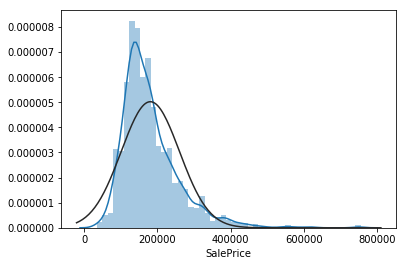

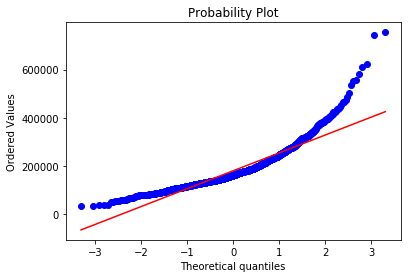

In [28]:
#NOrmality plot using seaborn
from scipy.stats import norm
sn.distplot(train['SalePrice'],fit = norm)
fig = plt.figure()
#probability plot
res = stats.probplot(train['SalePrice'],plot=plt)

Here, the target data is not normal .so, we are going to use log to transform the target value

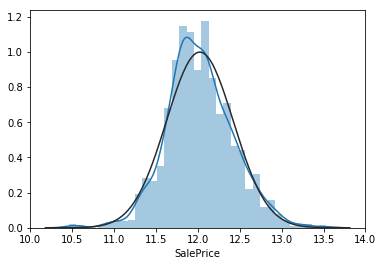

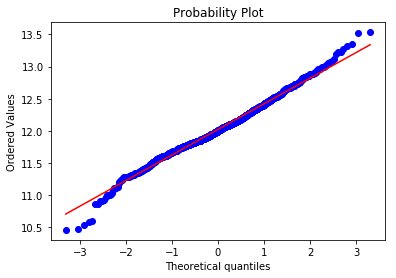

In [29]:
#to make normal
train['SalePrice'] = np.log(train['SalePrice'])
sn.distplot(train['SalePrice'],fit = norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)

Now , the target values satisfies the normality.That looks much more normal, which will hopefully improve the regressions

#### Step 5:
try to use Single decision Tree model for the  Selected data to check the explained variance (Accuracy metrics)

In [30]:
from sklearn.tree import DecisionTreeRegressor
#Picking random dataset to test the singletree performance
X = train[['MoSold','YrSold','LotArea','BedroomAbvGr']]
Y = train['SalePrice']
dataset = [X,Y]

In [31]:
#testing data
X_test = test[['MoSold','YrSold','LotArea','BedroomAbvGr']]

In [32]:
#Applying decisionTreeRegressor model
model = DecisionTreeRegressor().fit(X,Y)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
# let's set up some cross-validation analysis to evaluate our model and later models...
from sklearn.model_selection import cross_val_score

score_dtr = cross_val_score(model,X,Y,cv = 10,scoring = 'explained_variance')   #10-fold cross validation
print('Scoring for 10-fold cross validation: ',score_dtr)
print('Est. Explained variance: %0.2f (+/- %0.2f)'%(score_dtr.mean(),score_dtr.std()*2))


Scoring for 10-fold cross validation:  [-0.41939404 -0.31618443 -0.30188868 -0.38338026 -0.13559854 -0.66606873
 -0.43117563 -0.74455425 -1.17247503 -0.35071632]
Est. Explained variance: -0.49 (+/- 0.56)


For explained variance, the best possible result is 1, which would correspond to  Var(y−yest)=0 . Values below 1 indicate error in the regression. Negative values imply  Var(y−y¯)>Var(y) , which is frankly embarrasing.

#### Step 6: 
Using random forest Regression (multiple trees)

In [34]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
estimators = [1,5,10,15,20,25,30,35,40,50,65,70,75,80]
mean_rfr = []
std_lower_rfr = []
std_upper_rfr = []
for i in estimators:
    rfr = RandomForestRegressor(n_estimators = i).fit(X,Y)
    score_rfr = cross_val_score(rfr,X,Y,cv = 10,scoring = 'explained_variance')
    print('Estimator: ',i)
    print('Scoring for 10 fold cross validation : ',score_rfr)
    print('Est. explained variance: %0.2f (+/- %0.2f)'%(score_rfr.mean(),score_rfr.std()*2))
    print()
    mean_rfr.append(score_rfr.mean())
    std_upper_rfr.append(score_rfr.mean()+score_rfr.std()*2)
    std_lower_rfr.append(score_rfr.mean()-score_rfr.std()*2)

Estimator:  1
Scoring for 10 fold cross validation :  [-0.41717666 -0.30104846 -0.33220921 -0.2484555  -0.41684567 -0.59154524
 -0.4410728  -0.71738443 -0.94515808 -0.45530715]
Est. explained variance: -0.49 (+/- 0.40)

Estimator:  5
Scoring for 10 fold cross validation :  [ 0.00672233  0.11045786  0.04567798  0.09277594  0.17588089  0.06985615
  0.02999785 -0.10705392 -0.11398322  0.04385974]
Est. explained variance: 0.04 (+/- 0.17)

Estimator:  10
Scoring for 10 fold cross validation :  [ 0.14924481  0.16602479  0.15990324  0.12367181  0.0718738   0.13744054
  0.08969623  0.08121345 -0.07070476  0.1433647 ]
Est. explained variance: 0.11 (+/- 0.13)

Estimator:  15
Scoring for 10 fold cross validation :  [ 0.19696787  0.23364974  0.13916253  0.17115398  0.1898161   0.1982961
  0.06689441  0.02365649 -0.1361516   0.17350763]
Est. explained variance: 0.13 (+/- 0.21)

Estimator:  20
Scoring for 10 fold cross validation :  [ 0.20642531  0.2366796   0.15326981  0.1835877   0.12046714  0.212

#### Step 7:
still,the performance is poor (variance should be close to 1 ,but here 0.16 for 80 trees)...
So,then we are decided to go with feature selection. (means whch feature is best to take into the model for getting high variance)

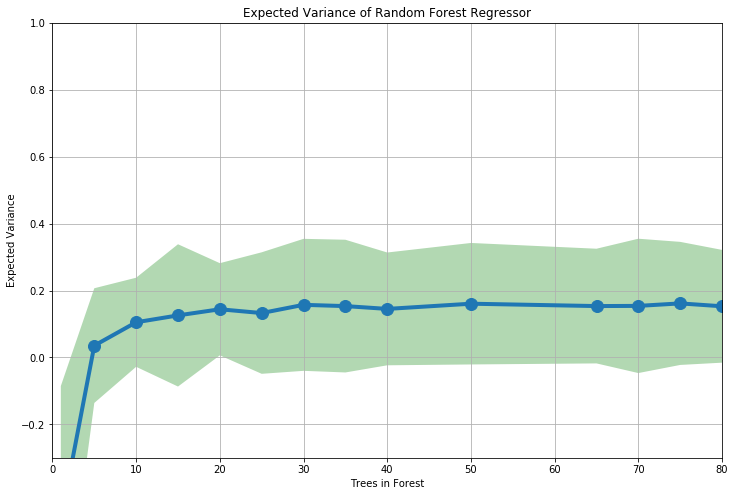

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfr,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_lower_rfr,std_upper_rfr,
               facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

The feature taken to fit the model is not good

### Step 8:
If we increase the feature the model performance is increasing

In [36]:
included_features = ['MoSold','YrSold','LotArea','BedroomAbvGr', # original data
                    'FullBath','HalfBath','TotRmsAbvGrd', # bathrooms and total rooms
                    'YearBuilt','YearRemodAdd', # age of the house
                    'LotShape','Utilities']
#training data
X = train[included_features]
Y = train['SalePrice']

#test_data
X_test = test[included_features]

#To change from object to int
for i in list(X):
    if X[i].dtypes == 'O':
        X = str_column_to_int(X,i)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MoSold,YrSold,LotArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,Utilities
0,2,2008,8450,3,2,1,8,2003,2003,0,0
1,5,2007,9600,3,2,0,6,1976,1976,0,0
2,9,2008,11250,3,2,1,6,2001,2002,1,0
3,2,2006,9550,3,1,0,7,1915,1970,1,0
4,12,2008,14260,4,2,1,9,2000,2000,1,0


In [37]:
#fitting to a model,.
#RandomForestRegressor
estimators = [1,5,10,15,20,25,30,35,40,50,65,70,75,80]
mean_rfr = []
std_lower_rfr = []
std_upper_rfr = []
for i in estimators:
    rfr = RandomForestRegressor(n_estimators = i).fit(X,Y)
    score_rfr = cross_val_score(rfr,X,Y,cv = 10,scoring = 'explained_variance')
    print('Estimator: ',i)
    print('Scoring for 10 fold cross validation : ',score_rfr)
    print('Est. explained variance: %0.2f (+/- %0.2f)'%(score_rfr.mean(),score_rfr.std()*2))
    print()
    mean_rfr.append(score_rfr.mean())
    std_upper_rfr.append(score_rfr.mean()+score_rfr.std()*2)
    std_lower_rfr.append(score_rfr.mean()-score_rfr.std()*2)

Estimator:  1
Scoring for 10 fold cross validation :  [0.28096006 0.53450145 0.54264619 0.57491004 0.54204875 0.4482361
 0.46640811 0.39977788 0.32876401 0.35528453]
Est. explained variance: 0.45 (+/- 0.19)

Estimator:  5
Scoring for 10 fold cross validation :  [0.58789204 0.67578894 0.74324019 0.63498184 0.69268369 0.67811867
 0.67112131 0.62991603 0.56756946 0.57385558]
Est. explained variance: 0.65 (+/- 0.11)

Estimator:  10
Scoring for 10 fold cross validation :  [0.65485238 0.74311156 0.7426911  0.66225525 0.72367887 0.76015878
 0.68917044 0.66365381 0.61897105 0.58087093]
Est. explained variance: 0.68 (+/- 0.11)

Estimator:  15
Scoring for 10 fold cross validation :  [0.67380343 0.704802   0.78206071 0.67835304 0.73855827 0.75872963
 0.72690186 0.66310181 0.6360601  0.63814892]
Est. explained variance: 0.70 (+/- 0.10)

Estimator:  20
Scoring for 10 fold cross validation :  [0.66498902 0.72599813 0.74778598 0.70488186 0.7456783  0.79856182
 0.71533948 0.69768963 0.63326523 0.65472

Now the model is better than before bcoz we increases the features, performance value increases (var :from 0.17 to 0.71), but not good bcoz the variance should be close to 1

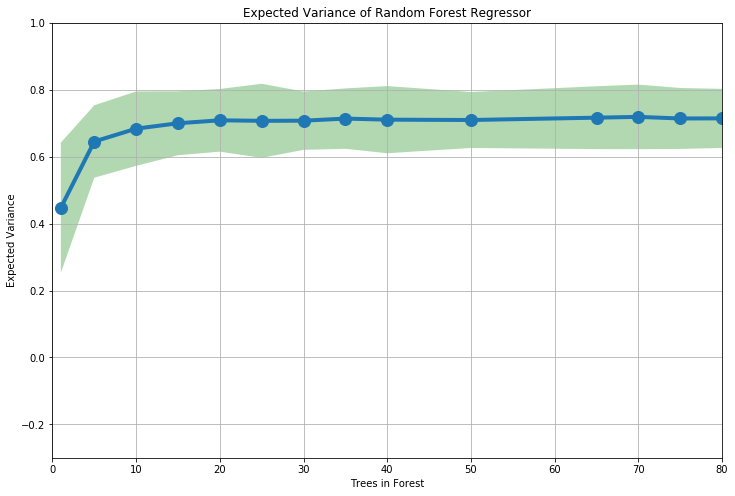

In [38]:
#Plotting
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfr,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_lower_rfr,std_upper_rfr,
               facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

#### Step 8:
Feature Selection : techniques to find Important Features selection for the model.

In [39]:
import sklearn.feature_selection as fs
train = pd.read_csv('train.csv')
train['SalePrice'] = np.log(train['SalePrice'])

included_features = [col for col in list(train) 
                     if len([i for i in train[col].T.notnull() if i == True]) == 1460 and col != 'SalePrice' and col != 'Id']
#train data
X = train[included_features]
Y = train['SalePrice']
yt = [i for i in Y]
#test data
X_test = test[included_features]

for i in list(X):
    if X[i].dtypes == 'O':
        X = str_column_to_int(X,i)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,8450,0,0,0,0,0,0,1,...,61,0,0,0,0,0,2,2008,0,0
1,20,0,9600,0,0,0,0,3,0,22,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,11250,0,1,0,0,0,0,1,...,42,0,0,0,0,0,9,2008,0,0
3,70,0,9550,0,1,0,0,1,0,11,...,35,272,0,0,0,0,2,2006,0,2
4,60,0,14260,0,1,0,0,3,0,13,...,84,0,0,0,0,0,12,2008,0,0


In [40]:
# to visualize the important features
import numpy as np
from sklearn.feature_selection import mutual_info_regression
mir_res = mutual_info_regression(X,Y)
feature_values = []
for i in np.arange(len(included_features)):
    feature_values.append([included_features[i] , mir_res[i]])
#sorting from highest value to find the highest dependency
sorted_values = sorted(feature_values , key= lambda s: s[1] , reverse =True)
np.array(sorted_values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([['OverallQual', '0.5221473923034516'],
       ['GrLivArea', '0.37708821689017413'],
       ['GarageCars', '0.3695377717728361'],
       ['KitchenQual', '0.3285475471147947'],
       ['ExterQual', '0.32529243579154143'],
       ['GarageArea', '0.29229999079024993'],
       ['YearBuilt', '0.2745195621302323'],
       ['FullBath', '0.2684346332727636'],
       ['TotalBsmtSF', '0.26312077017562396'],
       ['1stFlrSF', '0.2469312283082088'],
       ['YearRemodAdd', '0.1992526772723533'],
       ['Foundation', '0.19684519277095158'],
       ['TotRmsAbvGrd', '0.18276397634535613'],
       ['Fireplaces', '0.17147749550591818'],
       ['HeatingQC', '0.17011388597599586'],
       ['BsmtFinSF1', '0.12342087334784835'],
       ['MSZoning', '0.12017544628130428'],
       ['2ndFlrSF', '0.11112708567457275'],
       ['OverallCond', '0.1059893308771338'],
       ['LotArea', '0.08982564720860298'],
       ['LotShape', '0.0882537113763735'],
       ['HalfBath', '0.08318789860124975'],
       [

What do homebuyers mostly care about?
 They care about the quality of the house,living area ,garage for cars,kitchen quality etc..

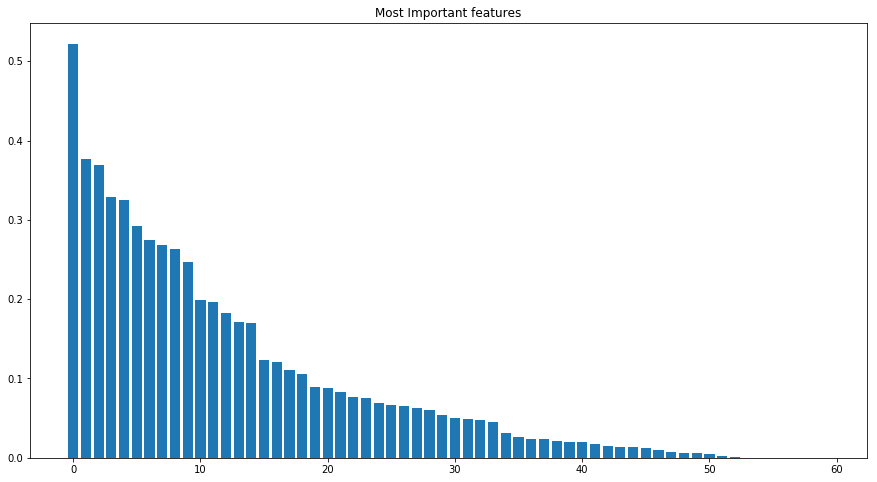

In [41]:
#feature importance
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ind = np.arange(len(included_features))
plt.bar(ind,[float(i) for i in np.array(sorted_values)[:,1]])
plt.title('Most Important features')
plt.show()

#### Step 9:
Combining everything

In [42]:
def getModel(sorted_values,train,NumFeatures):
    included_features = [col for col in np.array(sorted_values)[:,0][:NumFeatures]]
    
    #train_data
    X = train[included_features]
    Y = train['SalePrice']
    for i in list(X):
        if X[i].dtypes == 'O':
            X = str_column_to_int(X,i)
    yt = [i for i in Y]
    
    #test data
    X_test = test[included_features]
    
    #Model
    #fitting to a model,.
    estimators = [1,5,10,15,20,25,30,35,40,50,65,70,75,80]
    mean_rfr = []
    std_lower_rfr = []
    std_upper_rfr = []
    for i in estimators:
        rfr = RandomForestRegressor(n_estimators = i).fit(X,Y)
        score_rfr = cross_val_score(rfr,X,Y,cv = 10,scoring = 'explained_variance')
        #print('Estimator: ',i)
        #print('Scoring for 10 fold cross validation : ',score_rfr)
        #print('Est. explained variance: %0.2f (+/- %0.2f)'%(score_rfr.mean(),score_rfr.std()*2))
        #print()
        mean_rfr.append(score_rfr.mean())
        std_upper_rfr.append(score_rfr.mean()+score_rfr.std()*2)
        std_lower_rfr.append(score_rfr.mean()-score_rfr.std()*2)
    return mean_rfr,std_upper_rfr,std_lower_rfr

In [43]:
#getModel(sorted_values,train,3)

In [44]:
def plotModel(mean_rfr,std_upper_rfr,std_lower_rfr,NumFeatures):
    #Plotting
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(estimators,mean_rfr,marker='o',
            linewidth=4,markersize=12)
    ax.fill_between(estimators,std_lower_rfr,std_upper_rfr,
                    facecolor='green',alpha=0.3,interpolate=True)
    ax.set_ylim([-.3,1])
    ax.set_xlim([0,80])
    plt.title('Expected Variance of Random Forest Regressor: Top %d Features'%NumFeatures)
    plt.ylabel('Expected Variance')
    plt.xlabel('Trees in Forest')
    plt.grid()
    plt.show()
    return

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


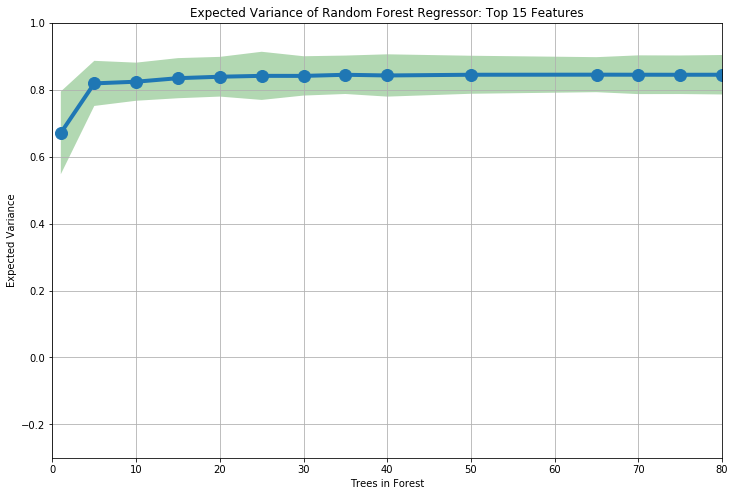

In [45]:
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_values,train,15)
plotModel(mean_rfrs,std_rfrs_upper,std_rfrs_lower,15)

In [46]:
X_test.head()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


In [47]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,8450,0,0,0,0,0,0,1,...,61,0,0,0,0,0,2,2008,0,0
1,20,0,9600,0,0,0,0,3,0,22,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,11250,0,1,0,0,0,0,1,...,42,0,0,0,0,0,9,2008,0,0
3,70,0,9550,0,1,0,0,1,0,11,...,35,272,0,0,0,0,2,2006,0,2
4,60,0,14260,0,1,0,0,3,0,13,...,84,0,0,0,0,0,12,2008,0,0


### Testing the model with unseen data:

In [49]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
# creating a function that changes categorical values to the int values ie,. first categorical value changes to 0 , second to 1 and so on,.
def str_column_to_int(data,column,datalen = 1460):
    if data[column].dtypes != 'O': #if its not an object then
        print('feature ',column,' is an integer value')
        return data
    
    
    
    else:   #if its object and it has equal length then
        df = data
        counts = df[column].value_counts()
        df[column] = [counts.index.tolist().index(i) if i in counts.index.tolist() else 0 for i in df[column] ]
        return df
    



In [93]:
# build the model with the desired parameters...
numFeatures = 40 # the number of features to inlcude
trees = 60 # trees in the forest
included_features = np.array(sorted_values)[:,0][:numFeatures]
# define the training data X...
X = train[included_features]
Y = train[['SalePrice']]
# transform categorical data if included in X...
for col in list(X):
    if X[col].dtype=='object':
        X = str_column_to_int(X, col)
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)
model = RandomForestRegressor(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# fit the model
model.fit(X,yt)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


explained variance scores for k=10 fold validation: [0.83896534 0.89605989 0.89391086 0.84043926 0.86487636 0.90235022
 0.88584655 0.90124159 0.84714389 0.85776756]
Est. explained variance: 0.87 (+/- 0.05)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
X_test = test[included_features]
X_test.head()

,OverallQual,GrLivArea,GarageCars,KitchenQual,ExterQual,GarageArea,YearBuilt,FullBath,TotalBsmtSF,1stFlrSF,...,BldgType,HouseStyle,WoodDeckSF,PavedDrive,Exterior2nd,Exterior1st,LandContour,EnclosedPorch,BsmtFullBath,LotConfig
0,5,896,1.0,TA,TA,730.0,1961,1,882.0,896,...,1Fam,1Story,140,Y,VinylSd,VinylSd,Lvl,0,0.0,Inside
1,6,1329,1.0,Gd,TA,312.0,1958,1,1329.0,1329,...,1Fam,1Story,393,Y,Wd Sdng,Wd Sdng,Lvl,0,0.0,Corner
2,5,1629,2.0,TA,TA,482.0,1997,2,928.0,928,...,1Fam,2Story,212,Y,VinylSd,VinylSd,Lvl,0,0.0,Inside
3,6,1604,2.0,Gd,TA,470.0,1998,2,926.0,926,...,1Fam,2Story,360,Y,VinylSd,VinylSd,Lvl,0,0.0,Inside
4,8,1280,2.0,Gd,Gd,506.0,1992,2,1280.0,1280,...,TwnhsE,1Story,0,Y,HdBoard,HdBoard,HLS,0,0.0,Inside


In [106]:
for col in list(X_test):
    if X_test[col].dtypes == 'O':
        X_test = str_column_to_int(X_test,col,datalen = 1459)
y_output = model.predict(X_test.fillna(0))

In [107]:
y_output

array([11.77748104, 11.94452013, 12.08797325, ..., 11.96550168,
       11.65341264, 12.36641618])

In [111]:
SalesPrice = np.exp(y_output)

In [112]:
SalesPrice

array([130285.18292255, 153971.0896183 , 177721.54523245, ...,
       157235.77085407, 115083.43254841, 234782.81721571])

In [115]:
final_price = pd.DataFrame(SalesPrice , columns = ['SalePrice'])

In [119]:
res = pd.concat([test['Id'],final_price],axis = 1)

In [120]:
res

,Id,SalePrice
0,1461,130285.182923
1,1462,153971.089618
2,1463,177721.545232
3,1464,181021.944983
4,1465,194169.754153
5,1466,184246.014735
6,1467,170302.962431
7,1468,175702.569228
8,1469,186454.030330
9,1470,116231.483758
